#### Importing the Required Libraries

In [138]:
import numpy as np                                       # to create array
import pandas as pd                                      # for creating dataframe
import matplotlib.pyplot as plt                          # to plot the data (visulaize it)
import seaborn as sns                                    # to plot the data (visulaize it)
import sklearn.datasets                                  # to get the dataset we need to work with from the sklearn
from sklearn.model_selection import train_test_split     # to split the data into train and test
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn import metrics                              # for evaluation the model

#### Loading California_Housing Dataset from Datasets library

In [27]:
california_house_price_dataset = sklearn.datasets.fetch_california_housing()

#### Loading the dataset into pandas dataframe 

In [21]:
house_price_df = pd.DataFrame(california_house_price_dataset.data, columns=california_house_price_dataset.feature_names)

#### Adding The target Column (Price) into the DataFrame

In [30]:
house_price_df['Price'] = california_house_price_dataset.target

In [32]:
house_price_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [37]:
# chech the number of rows and columns in the dataframe
house_price_df.shape

(20640, 9)

* It seems the dataset contains 20640 rows and 9 columns including the price of a house.

In [42]:
# check for the missing values in the dataframe
house_price_df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

* There is not any missing values in this dataframe 

In [45]:
# statistical measures of the dataset
house_price_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


#### Understanding the correlation between various features in the dataset
* 1. poistive correlation  ==> one variable increases the other also increases
  2. negative correlation  ==> one variable decreases the other also decreases

In [68]:
correlation = house_price_df.corr()

<Axes: >

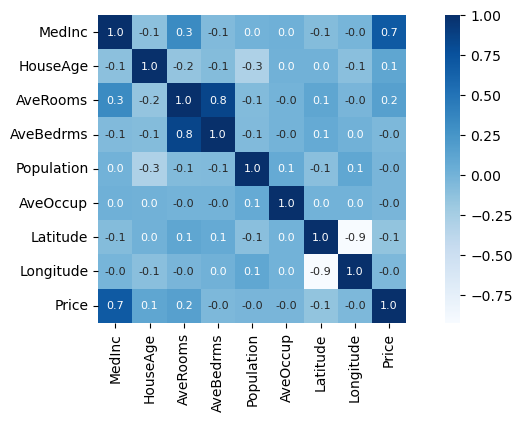

In [100]:
### constructing a heatmap to understand the correlation
plt.figure(figsize=(10, 4))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')

##### Spliting the data into Features and Target

In [130]:
X = house_price_df.drop(['Price'], axis=1)
y = house_price_df['Price']

##### Splingting the data into training and testing data


In [132]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 3)

In [143]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape) 

(16512, 8) (4128, 8) (16512,) (4128,)


# Train the Models

##### XGBoost Regrassor 

In [148]:
xgregressor = XGBRegressor()

In [150]:
# train the model with x train, y train data. 
xgregressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

##### Linear Regration model 

In [153]:
# loading the mode
regressor = LinearRegression()

In [ ]:
regressor